In [41]:
from blooms_filter import BloomsFilter
from test_false_positive_rate import test_false_positive_rate

bf = BloomsFilter(m=10000, k=5)
fpr = test_false_positive_rate(bf, num_inserted=1000, num_tests=10000)
print(f"Процент ложноположительных срабатываний: {fpr:.2%}")

Процент ложноположительных срабатываний: 0.82%


m \ k	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19
1000	0.6367	0.7670	0.8592	0.9415	0.9672	0.9728	0.9954	0.9953	0.9948	0.9959	0.9951	0.9959	0.9953	0.9956	0.9960	0.9958	0.9959	0.9958	0.9950
2000	0.3923	0.4074	0.4707	0.5375	0.6313	0.7097	0.7827	0.8606	0.9086	0.9348	0.9673	0.9781	0.9823	0.9883	0.9935	0.9881	0.9804	0.9949	0.9866
3000	0.2786	0.2446	0.2592	0.3010	0.3742	0.4111	0.4534	0.5429	0.6549	0.6796	0.7490	0.7894	0.8370	0.9147	0.8669	0.8825	0.9321	0.9622	0.9365
4000	0.2161	0.1561	0.1474	0.1537	0.1925	0.2190	0.2526	0.3167	0.3692	0.4208	0.4768	0.5421	0.6243	0.6798	0.6871	0.7760	0.7587	0.8064	0.8781
5000	0.1815	0.1088	0.0941	0.0980	0.1006	0.1237	0.1378	0.1733	0.1806	0.2470	0.2873	0.3450	0.3600	0.4417	0.4942	0.5274	0.5522	0.6240	0.6678
6000	0.1475	0.0795	0.0595	0.0576	0.0573	0.0634	0.0717	0.0949	0.0954	0.1240	0.1407	0.1656	0.1958	0.2406	0.2729	0.2938	0.3526	0.4185	0.4315
7000	0.1406	0.0653	0.0422	0.0355	0.0363	0.0353	0.0396	0.0477	0.0616	0.0639	0.0717	0.0867	0.1006	0.1302	0.1508	0.1731	0

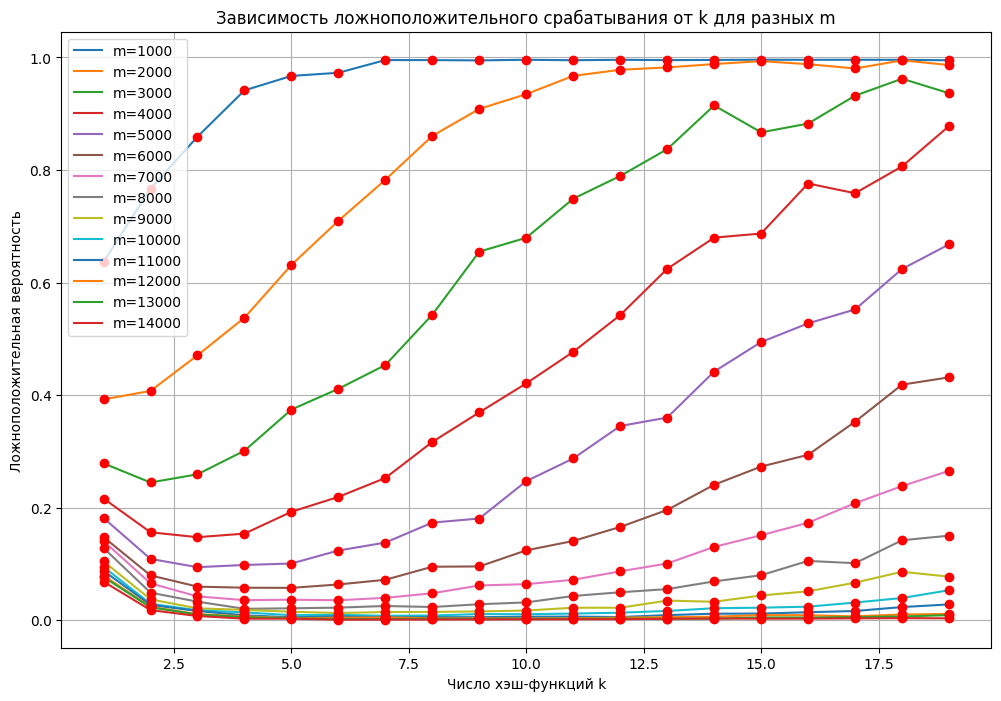

In [42]:
import matplotlib.pyplot as plt

# Функция для получения данных для таблицы
def evaluate_fpr(m_values, k_values, num_inserted, num_tests):
    results = []
    for m in m_values:
        row = []
        for k in k_values:
            bf = BloomsFilter(m=m, k=k)
            fpr = test_false_positive_rate(bf, num_inserted, num_tests)
            row.append(fpr)
        results.append(row)
    return results

# Параметры
num_inserted = 1000  # количество вставленных элементов
num_tests = 10000    # количество тестовых элементов
m_values = [i for i in range(1000, 15000, 1000)]  # возможные значения m
k_values = [i for i in range(1, 20)]  # возможные значения k

# Получаем данные для таблицы
fpr_data = evaluate_fpr(m_values, k_values, num_inserted, num_tests)

header = "m \\ k\t" + "\t".join([str(k) for k in k_values])
print(header)
for idx, m in enumerate(m_values):
    row = f"{m}\t" + "\t".join([f"{fpr_data[idx][i]:.4f}" for i in range(len(k_values))])
    print(row)

# Построение графиков

plt.figure(figsize=(12, 8))

# Для каждого значения m строим кривую зависимости от k
for m in m_values:
    rates = [fpr_data[m_values.index(m)][i] for i in range(len(k_values))]
    plt.plot(k_values, rates, label=f'm={m}')
    # Добавляем ключевые точки на график
    plt.scatter(k_values, rates, color='red', zorder=5)

plt.xlabel('Число хэш-функций k')
plt.ylabel('Ложноположительная вероятность')
plt.title('Зависимость ложноположительного срабатывания от k для разных m')
plt.legend()
plt.grid(True)
plt.show()
